# Fashion MNIST Dataset Visualization

This notebook explores the Fashion MNIST dataset and visualizes samples from each category.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

In [2]:
# Define class labels
class_names = [
    'T-shirt/top',  
    'Trouser',      
    'Pullover',     
    'Dress',        
    'Coat',         
    'Sandal',       
    'Shirt',        
    'Sneaker',      
    'Bag',          
    'Ankle boot'    
]

print(f"Fashion MNIST has {len(class_names)} classes:")
for i, name in enumerate(class_names):
    print(f"  {i}: {name}")

Fashion MNIST has 10 classes:
  0: T-shirt/top
  1: Trouser
  2: Pullover
  3: Dress
  4: Coat
  5: Sandal
  6: Shirt
  7: Sneaker
  8: Bag
  9: Ankle boot


## Load the Dataset from CSV

In [3]:
# Load training data
print("Loading training data...")
train_df = pd.read_csv('archive (1)/fashion-mnist_train.csv')

# Load test data
print("Loading test data...")
test_df = pd.read_csv('archive (1)/fashion-mnist_test.csv')

print(f"\nTraining samples: {len(train_df)}")
print(f"Test samples: {len(test_df)}")
print(f"\nDataset shape: {train_df.shape}")
print(f"First column (label) + 784 columns (28x28 pixels)")

Loading training data...


FileNotFoundError: [Errno 2] No such file or directory: 'archive (1)/fashion-mnist_train.csv'

In [ ]:
# Display first few rows
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Dataset Statistics

Class distribution in training set:
  0 (T-shirt/top): 6000 images
  1 (Trouser): 6000 images
  2 (Pullover): 6000 images
  3 (Dress): 6000 images
  4 (Coat): 6000 images
  5 (Sandal): 6000 images
  6 (Shirt): 6000 images
  7 (Sneaker): 6000 images
  8 (Bag): 6000 images
  9 (Ankle boot): 6000 images


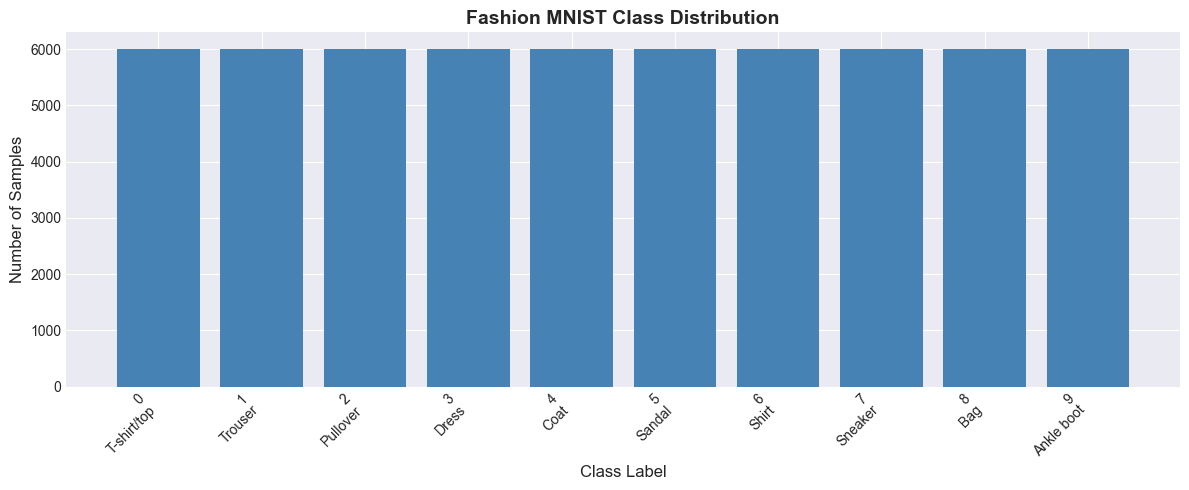

In [ ]:
# Class distribution
print("Class distribution in training set:")
class_counts = train_df['label'].value_counts().sort_index()
for label, count in class_counts.items():
    print(f"  {label} ({class_names[label]}): {count} images")

# Visualize class distribution
plt.figure(figsize=(12, 5))
plt.bar(range(10), [class_counts[i] for i in range(10)], color='steelblue')
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Fashion MNIST Class Distribution', fontsize=14, fontweight='bold')
plt.xticks(range(10), [f"{i}\n{class_names[i]}" for i in range(10)], rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Visualize Sample Images

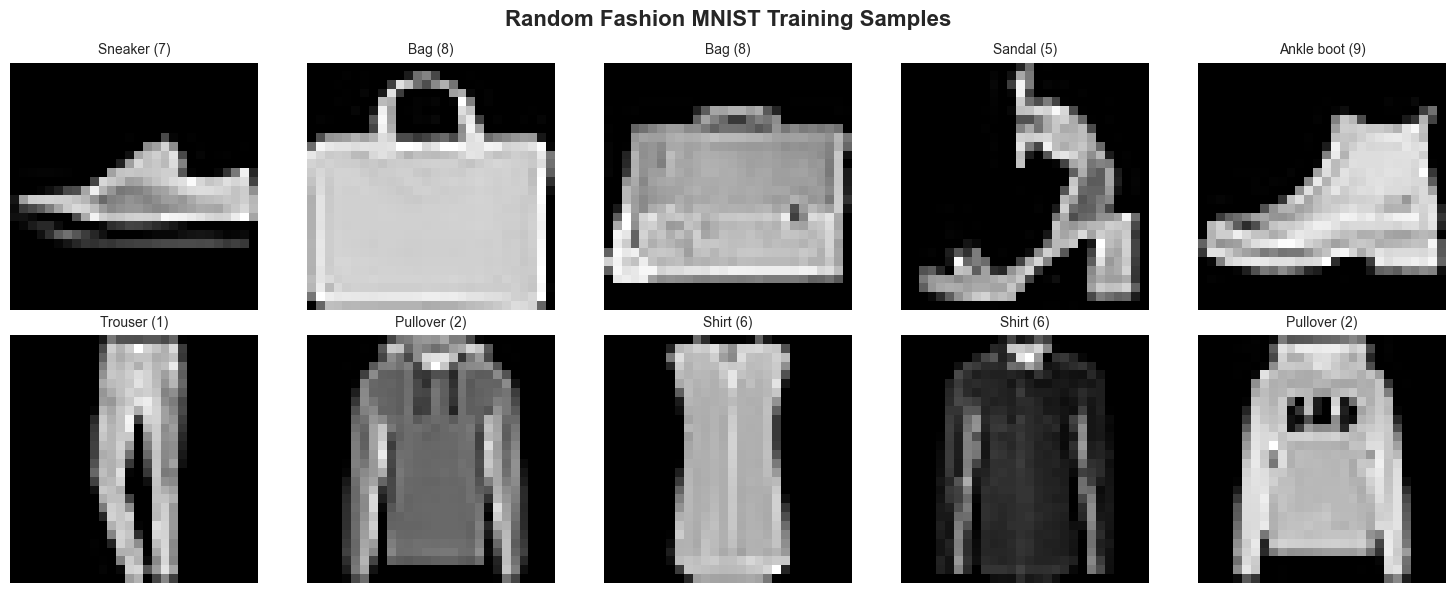

In [ ]:
# Function to display images
def display_samples(data, n_samples=10, title="Fashion MNIST Samples"):
    """
    Display random samples from the dataset
    """
    samples = data.sample(n=n_samples, random_state=42)
    
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle(title, fontsize=16, fontweight='bold')
    
    axes = axes.ravel()
    
    for idx, (_, row) in enumerate(samples.iterrows()):
        label = int(row['label'])
        pixels = row.drop('label').values.reshape(28, 28)
        
        axes[idx].imshow(pixels, cmap='gray')
        axes[idx].set_title(f"{class_names[label]} ({label})", fontsize=10)
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# Display random samples
display_samples(train_df, n_samples=10, title="Random Fashion MNIST Training Samples")

## Visualize One Sample from Each Class

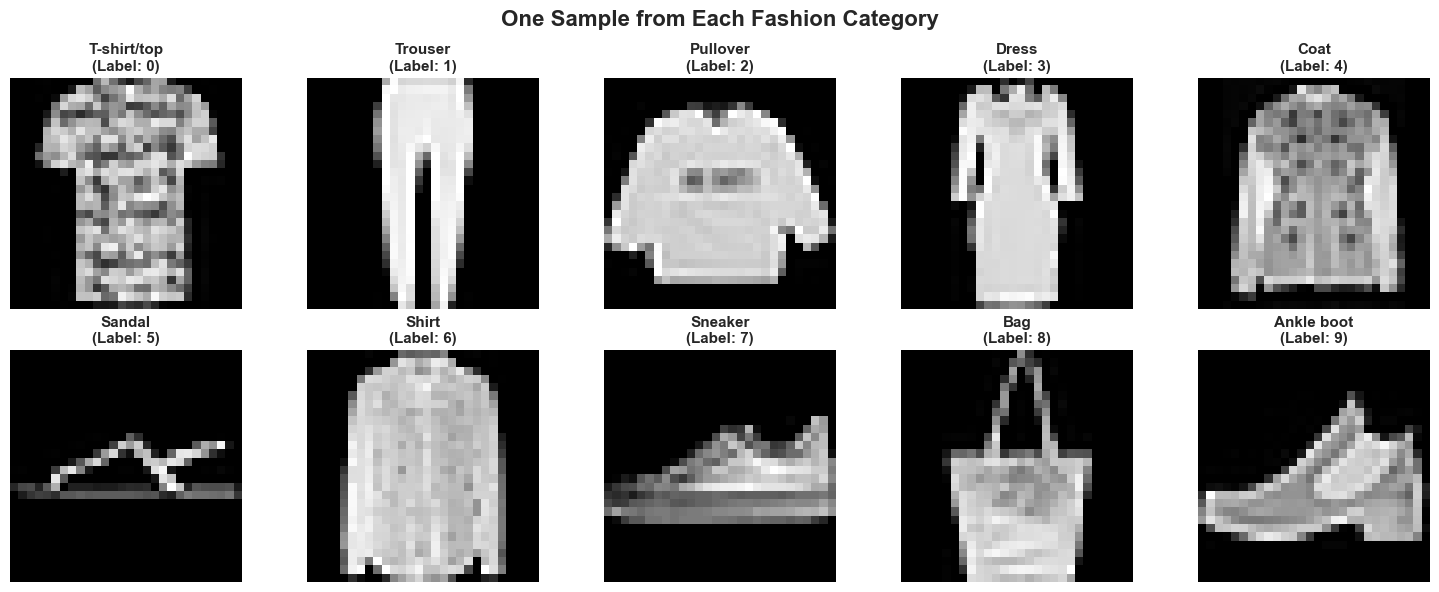

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('One Sample from Each Fashion Category', fontsize=16, fontweight='bold')

axes = axes.ravel()

for class_idx in range(10):
    # Get first sample of this class
    sample = train_df[train_df['label'] == class_idx].iloc[0]
    pixels = sample.drop('label').values.reshape(28, 28)
    
    axes[class_idx].imshow(pixels, cmap='gray')
    axes[class_idx].set_title(f"{class_names[class_idx]}\n(Label: {class_idx})", fontsize=11, fontweight='bold')
    axes[class_idx].axis('off')

plt.tight_layout()
plt.show()

## Visualize Multiple Samples per Class

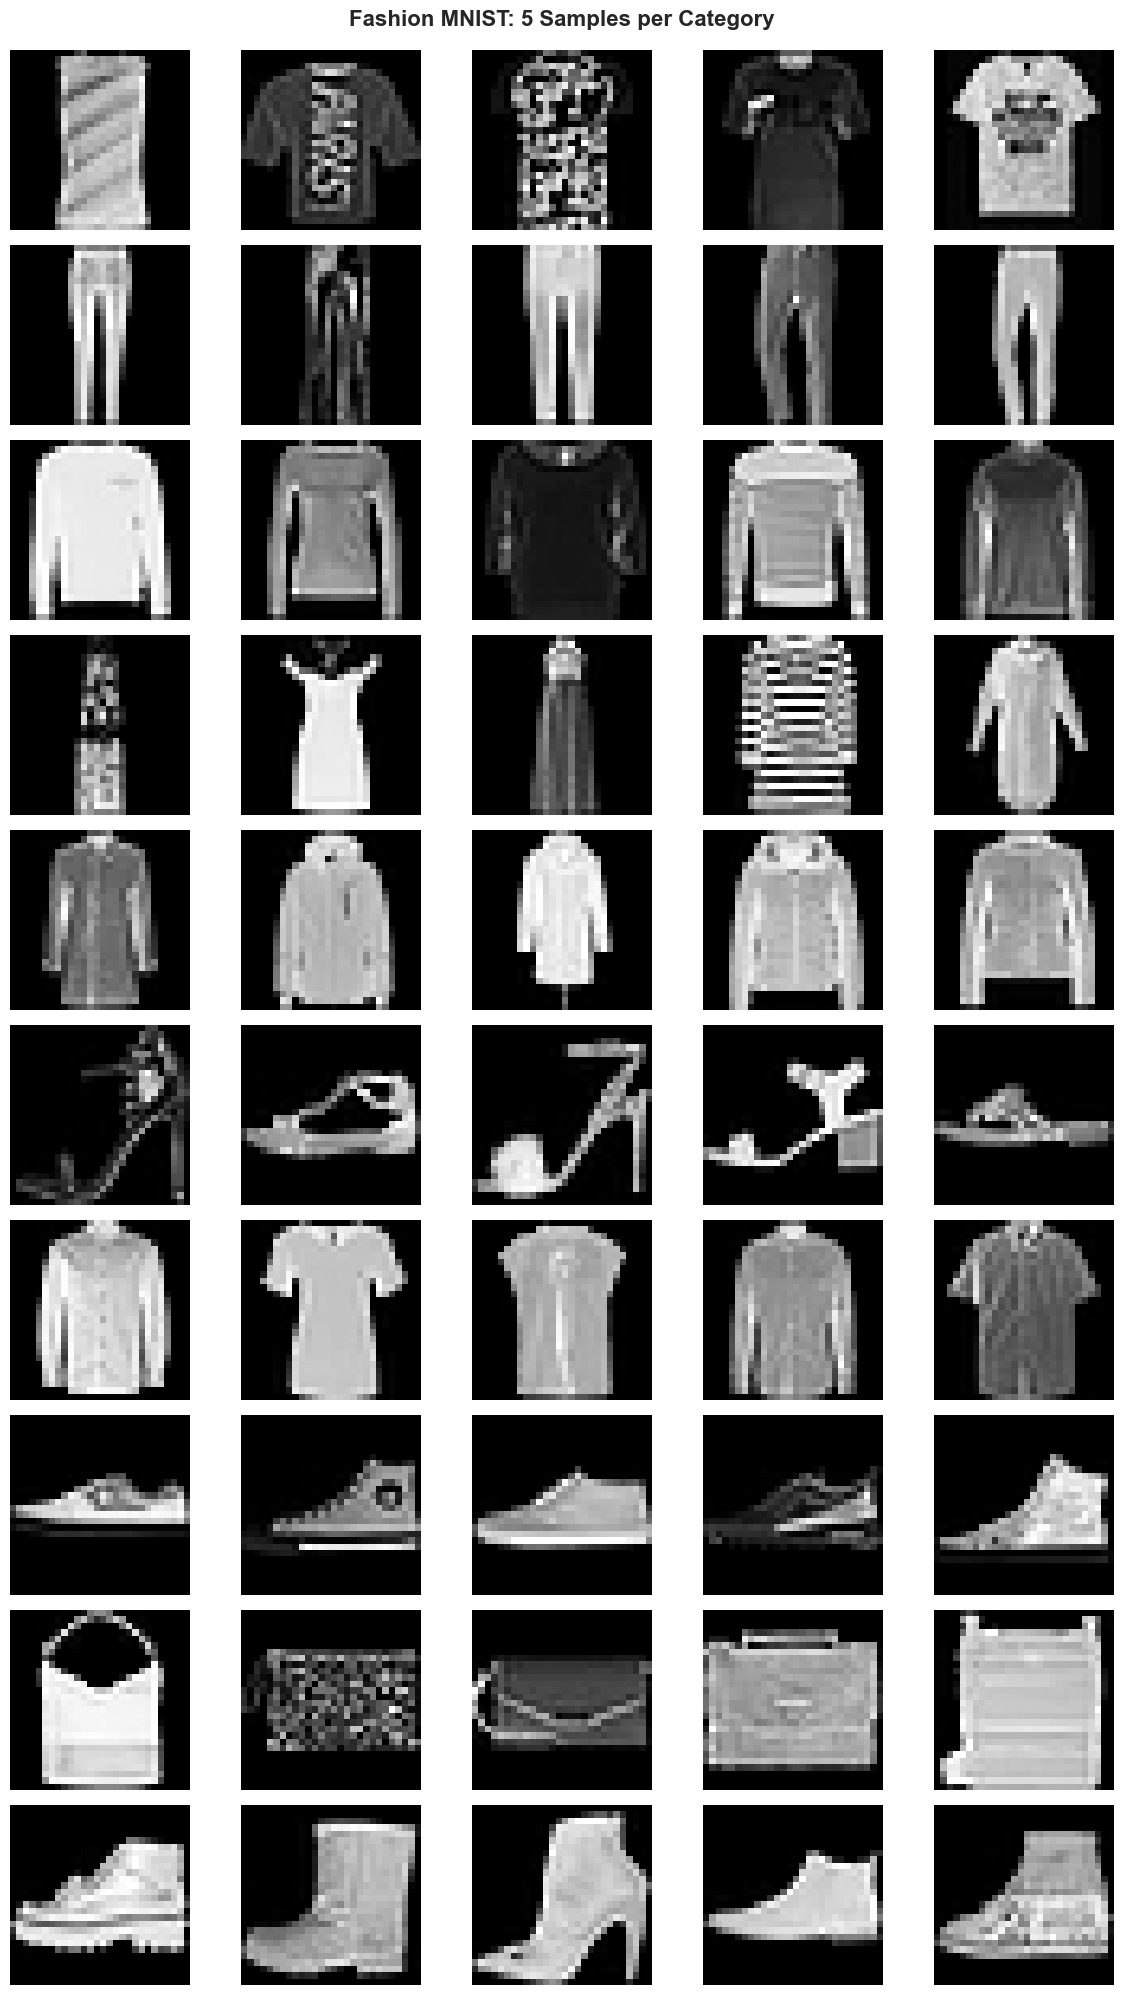

In [ ]:
n_samples_per_class = 5

fig, axes = plt.subplots(10, n_samples_per_class, figsize=(12, 20))
fig.suptitle('Fashion MNIST: 5 Samples per Category', fontsize=16, fontweight='bold', y=0.995)

for class_idx in range(10):
    class_samples = train_df[train_df['label'] == class_idx].sample(n=n_samples_per_class, random_state=42)
    
    for sample_idx, (_, row) in enumerate(class_samples.iterrows()):
        pixels = row.drop('label').values.reshape(28, 28)
        
        axes[class_idx, sample_idx].imshow(pixels, cmap='gray')
        axes[class_idx, sample_idx].axis('off')
        
        if sample_idx == 0:
            axes[class_idx, sample_idx].set_ylabel(class_names[class_idx], fontsize=10, fontweight='bold', rotation=90, labelpad=10)

plt.tight_layout()
plt.show()

## Pixel Value Distribution

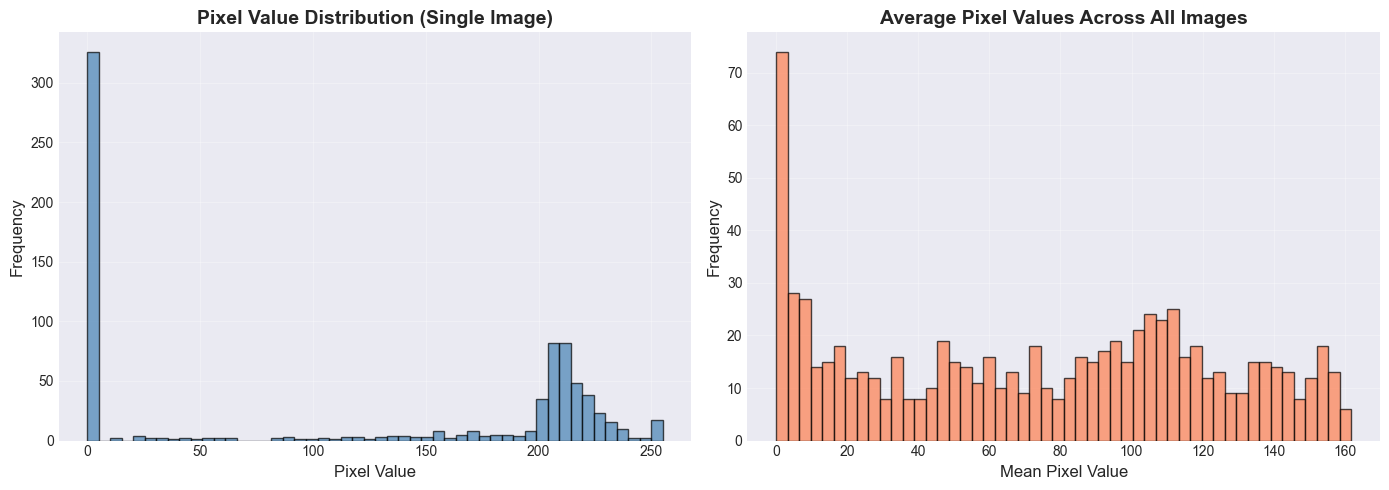

Pixel value range: 0 to 255
Mean pixel value: 115.35
Std deviation: 103.17


In [ ]:
# Analyze pixel value distribution
sample_image = train_df.iloc[0].drop('label').values

plt.figure(figsize=(14, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(sample_image, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Pixel Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Pixel Value Distribution (Single Image)', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# Average pixel values across all training images
plt.subplot(1, 2, 2)
mean_pixel_values = train_df.drop('label', axis=1).mean(axis=0)
plt.hist(mean_pixel_values, bins=50, color='coral', edgecolor='black', alpha=0.7)
plt.xlabel('Mean Pixel Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Average Pixel Values Across All Images', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Pixel value range: {sample_image.min()} to {sample_image.max()}")
print(f"Mean pixel value: {sample_image.mean():.2f}")
print(f"Std deviation: {sample_image.std():.2f}")

## Average Image per Class

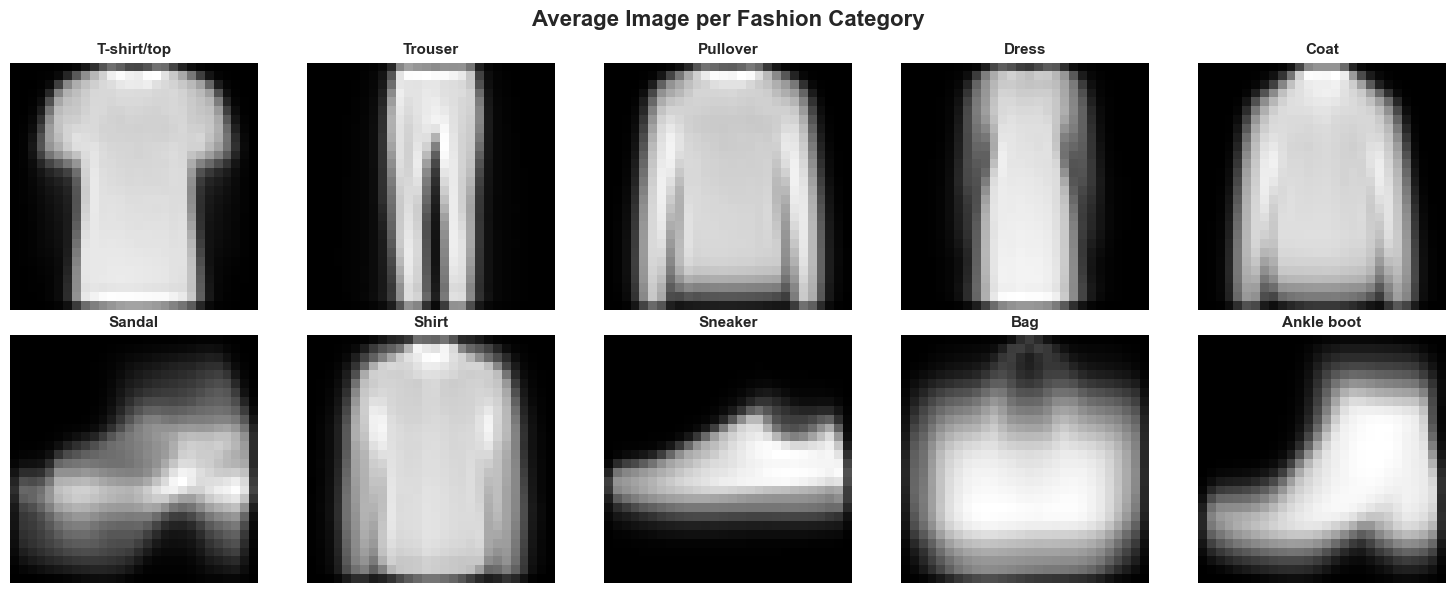

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Average Image per Fashion Category', fontsize=16, fontweight='bold')

axes = axes.ravel()

for class_idx in range(10):
    class_data = train_df[train_df['label'] == class_idx].drop('label', axis=1)
    
    mean_image = class_data.mean(axis=0).values.reshape(28, 28)
    
    axes[class_idx].imshow(mean_image, cmap='gray')
    axes[class_idx].set_title(f"{class_names[class_idx]}", fontsize=11, fontweight='bold')
    axes[class_idx].axis('off')

plt.tight_layout()
plt.show()

## Dataset Summary for Triplet Network

In [ ]:
print("=" * 60)
print("FASHION MNIST DATASET SUMMARY")
print("=" * 60)
print(f"\nDataset Size:")
print(f"   • Training samples: {len(train_df):,}")
print(f"   • Test samples: {len(test_df):,}")
print(f"   • Total samples: {len(train_df) + len(test_df):,}")

print(f"\n Image Properties:")
print(f"   • Dimensions: 28 × 28 pixels")
print(f"   • Color: Grayscale")
print(f"   • Pixel range: 0-255")
print(f"   • Total features per image: 784")

print(f"\nClasses: {len(class_names)}")
for i, name in enumerate(class_names):
    count = len(train_df[train_df['label'] == i])
    print(f"   {i}. {name:15s} - {count:,} samples")

print(f"\nFor Triplet Networks:")
print(f"   • Anchor: Reference image from a category")
print(f"   • Positive: Same category as anchor")
print(f"   • Negative: Different category from anchor")
print(f"   • Goal: Learn embeddings where similar items are close")

print(f"\nDataset is balanced and ready for training!")
print("=" * 60)

FASHION MNIST DATASET SUMMARY

Dataset Size:
   • Training samples: 60,000
   • Test samples: 10,000
   • Total samples: 70,000

 Image Properties:
   • Dimensions: 28 × 28 pixels
   • Color: Grayscale
   • Pixel range: 0-255
   • Total features per image: 784

Classes: 10
   0. T-shirt/top     - 6,000 samples
   1. Trouser         - 6,000 samples
   2. Pullover        - 6,000 samples
   3. Dress           - 6,000 samples
   4. Coat            - 6,000 samples
   5. Sandal          - 6,000 samples
   6. Shirt           - 6,000 samples
   7. Sneaker         - 6,000 samples
   8. Bag             - 6,000 samples
   9. Ankle boot      - 6,000 samples

For Triplet Networks:
   • Anchor: Reference image from a category
   • Positive: Same category as anchor
   • Negative: Different category from anchor
   • Goal: Learn embeddings where similar items are close

Dataset is balanced and ready for training!
